In [34]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[2]
Data_base_learning_v2 = main_path+open_folder[3]
Points_equipe = main_path+open_folder[3]
Teams_puissance = main_path+open_folder[5]

In [36]:
train_csv = pd.read_csv(Data_base_learning_v2,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,id_match,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,goalHomeTeam_FullTime,goalAwayTeam_FullTime,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam
0,0,267926,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,2.0,0,2,0,3,-1,-1,-1,-1,2409,6154
1,1,267922,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,2.0,0,0,0,2,-1,-1,-1,-1,4008,3054
2,2,267919,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,2.0,0,1,0,1,-1,-1,-1,-1,3029,100
3,3,267923,2019-08-10,522,530,OGC Nice,Amiens SC,1.0,1,0,2,1,-1,-1,-1,-1,2803,2045
4,4,267924,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,0.0,1,0,1,1,-1,-1,-1,-1,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1714,285542,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,1.0,1,0,1,0,1,2,0,0,6154,9319
1287,1715,285537,2020-03-10,95,102,Valencia CF,Atalanta BC,2.0,1,2,3,4,0,4,0,0,9770,7928
1288,1716,285545,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,1.0,2,0,3,0,1,0,0,0,9221,6821
1289,1717,285533,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,1.0,2,0,2,0,2,2,0,0,9495,7276


In [7]:
df = train_csv['goalAwayTeam_FullTime']
df.unique()

array([3, 2, 1, 0, 4, 5, 9, 6, 7], dtype=int64)

In [37]:
X = train_csv.drop(['id_match','idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
X = X[:,1:]
Y = train_csv['score'].values
X[0]

array([  -1,   -1,   -1,   -1, 2409, 6154], dtype=int64)

In [38]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)

(1032, 6) (1032,)


In [39]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [40]:
# for row in y_train:
#      print(row)

In [41]:
x_train

array([[   0,    1,    1,    0, 3086, 2242],
       [   1,    2,    0,    0, 4490, 6846],
       [   0,    0,    1,    0, 2817, 3982],
       ...,
       [   0,    1,    2,    0, 4490, 2679],
       [   0,    1,    1,    0, 4059, 6139],
       [   1,    0,    0,    0, 4554, 4059]], dtype=int64)

In [42]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [43]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               3584      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 69,635
Trainable params: 69,635
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=60,epochs=200)

Train on 1032 samples, validate on 259 samples
Epoch 1/200
1032/1032 [==============================] - 0s 66us/sample - loss: 6.4754 - accuracy: 0.4060 - val_loss: 3.7028 - val_accuracy: 0.4517
Epoch 2/200
1032/1032 [==============================] - 0s 56us/sample - loss: 3.1286 - accuracy: 0.4264 - val_loss: 4.9856 - val_accuracy: 0.3089
Epoch 3/200
1032/1032 [==============================] - 0s 53us/sample - loss: 3.3258 - accuracy: 0.4225 - val_loss: 2.6380 - val_accuracy: 0.3205
Epoch 4/200
1032/1032 [==============================] - 0s 47us/sample - loss: 3.4901 - accuracy: 0.4341 - val_loss: 2.8233 - val_accuracy: 0.3552
Epoch 5/200
1032/1032 [==============================] - 0s 47us/sample - loss: 3.0115 - accuracy: 0.4302 - val_loss: 4.4309 - val_accuracy: 0.3552
Epoch 6/200
1032/1032 [==============================] - 0s 44us/sample - loss: 4.0153 - accuracy: 0.4273 - val_loss: 2.1785 - val_accuracy: 0.5212
Epoch 7/200
1032/1032 [==============================] - 0s 46us/

Epoch 56/200
1032/1032 [==============================] - 0s 46us/sample - loss: 1.5672 - accuracy: 0.4448 - val_loss: 2.2949 - val_accuracy: 0.4440
Epoch 57/200
1032/1032 [==============================] - 0s 43us/sample - loss: 2.0229 - accuracy: 0.4234 - val_loss: 3.1967 - val_accuracy: 0.3320
Epoch 58/200
1032/1032 [==============================] - 0s 45us/sample - loss: 2.6999 - accuracy: 0.4157 - val_loss: 4.7613 - val_accuracy: 0.3359
Epoch 59/200
1032/1032 [==============================] - 0s 57us/sample - loss: 3.2090 - accuracy: 0.4186 - val_loss: 7.5021 - val_accuracy: 0.3320
Epoch 60/200
1032/1032 [==============================] - 0s 79us/sample - loss: 4.3519 - accuracy: 0.3973 - val_loss: 6.8641 - val_accuracy: 0.3398
Epoch 61/200
1032/1032 [==============================] - 0s 55us/sample - loss: 3.0055 - accuracy: 0.4302 - val_loss: 2.4670 - val_accuracy: 0.5212
Epoch 62/200
1032/1032 [==============================] - 0s 57us/sample - loss: 2.1425 - accuracy: 0.4370

Epoch 111/200
1032/1032 [==============================] - 0s 54us/sample - loss: 1.5420 - accuracy: 0.4564 - val_loss: 1.3306 - val_accuracy: 0.4672
Epoch 112/200
1032/1032 [==============================] - 0s 91us/sample - loss: 1.5392 - accuracy: 0.4234 - val_loss: 1.6466 - val_accuracy: 0.4981
Epoch 113/200
1032/1032 [==============================] - 0s 51us/sample - loss: 1.5546 - accuracy: 0.4457 - val_loss: 1.9569 - val_accuracy: 0.4479
Epoch 114/200
1032/1032 [==============================] - 0s 51us/sample - loss: 2.1890 - accuracy: 0.4486 - val_loss: 3.0667 - val_accuracy: 0.3707
Epoch 115/200
1032/1032 [==============================] - 0s 88us/sample - loss: 1.7858 - accuracy: 0.4225 - val_loss: 1.9232 - val_accuracy: 0.4402
Epoch 116/200
1032/1032 [==============================] - 0s 49us/sample - loss: 2.1072 - accuracy: 0.4234 - val_loss: 1.7165 - val_accuracy: 0.4633
Epoch 117/200
1032/1032 [==============================] - 0s 50us/sample - loss: 1.3233 - accuracy:

1032/1032 [==============================] - 0s 46us/sample - loss: 1.4260 - accuracy: 0.4709 - val_loss: 1.3086 - val_accuracy: 0.5019
Epoch 166/200
1032/1032 [==============================] - 0s 47us/sample - loss: 1.2827 - accuracy: 0.4506 - val_loss: 1.4325 - val_accuracy: 0.4942
Epoch 167/200
1032/1032 [==============================] - 0s 45us/sample - loss: 1.2873 - accuracy: 0.4583 - val_loss: 1.4793 - val_accuracy: 0.3900
Epoch 168/200
1032/1032 [==============================] - 0s 45us/sample - loss: 1.2444 - accuracy: 0.4748 - val_loss: 1.2122 - val_accuracy: 0.3900
Epoch 169/200
1032/1032 [==============================] - 0s 50us/sample - loss: 1.2090 - accuracy: 0.4545 - val_loss: 1.0768 - val_accuracy: 0.4981
Epoch 170/200
1032/1032 [==============================] - 0s 52us/sample - loss: 1.2641 - accuracy: 0.4525 - val_loss: 1.5277 - val_accuracy: 0.4208
Epoch 171/200
1032/1032 [==============================] - 0s 48us/sample - loss: 1.3326 - accuracy: 0.4516 - val_

Text(0, 0.5, 'Accuracy')

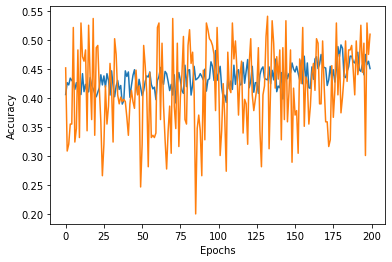

In [48]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [49]:
predictions = model.predict((x_test, y_test))

In [50]:
print(x_test[98])
print(y_test[98])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[98])
np.argmax(predictions[98])

[   0    1    0    0 4146 7938]
0
[0.00380503 0.26531056 0.73088443]


2

# Prédiction Unique

In [51]:
unique = train_csv.values
results = []
equal = []
victory = []
loss = []
i = 0

In [52]:
for i in unique:
    puissance_homeTeam = i[15]
    puissance_awayTeam = i[16]
    win_cons_home = i[11]
    win_cons_away = i[12]
    lose_cons_home = i[13]
    lose_cons_away= i[14]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    egalite = predictions1[0][0]*100
    victoire = predictions1[0][1]*100
    perte = predictions1[0][2]*100
    result = np.argmax(predictions1)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(result,egalite,victoire , perte ,puissance_homeTeam,puissance_awayTeam)

2 3.551914542913437 33.14692676067352 63.30115795135498 -1 2409
2 0.7766959723085165 31.238627433776855 67.98468232154846 -1 4008
2 2.3330288007855415 32.0742666721344 65.59269428253174 -1 3029
2 2.926664613187313 32.2477787733078 64.82555866241455 -1 2803
2 5.545440316200256 32.407742738723755 62.04681396484375 -1 2156
2 3.2760273665189743 32.315972447395325 64.40799832344055 -1 2690
2 31.91377818584442 27.747884392738342 40.33833146095276 -1 100
2 0.704082427546382 30.676445364952087 68.61947774887085 -1 4207
2 1.273391768336296 31.441321969032288 67.28528141975403 -1 3627
2 0.0032784068025648594 22.72614985704422 77.27056741714478 -1 9495
1 0.12166170636191964 56.07951879501343 43.798819184303284 0 6154
1 2.681674063205719 57.02224373817444 40.29608964920044 1 3029
1 4.927026107907295 57.089680433273315 37.98329532146454 1 2298
1 17.835894227027893 45.142364501953125 37.02174127101898 1 1065
1 5.7752154767513275 62.11746335029602 32.10732042789459 0 2020
1 9.879899024963379 48.39733

1 8.882582187652588 48.91413152217865 42.20328629016876 0 1736
1 4.677478596568108 62.69682049751282 32.62569308280945 0 2045
1 5.271591246128082 55.70172667503357 39.02667164802551 0 2298
1 1.3458030298352242 64.05559778213501 34.5986008644104 0 3749
1 10.802716761827469 72.42154479026794 16.77573025226593 0 1065
1 0.9145651012659073 62.640219926834106 36.445215344429016 0 4008
1 1.2421700172126293 59.024208784103394 39.73361551761627 1 3627
1 2.3306509479880333 50.64874291419983 47.0206081867218 2 3029
1 0.7495467085391283 68.340402841568 30.9100478887558 0 4207
1 2.978936955332756 62.88182735443115 34.13923978805542 0 2803
1 2.5188907980918884 55.964595079422 41.51651859283447 0 3054
1 5.891294777393341 63.02464008331299 31.08406364917755 0 2020
1 2.633821964263916 50.732892751693726 46.63328230381012 4 3029
1 32.00545310974121 41.655433177948 26.339107751846313 0 100
1 5.782071873545647 49.366962909698486 44.85096633434296 0 2298
1 6.261353939771652 56.39422535896301 37.34441995620

1 4.681769013404846 49.95453953742981 45.36369740962982 0 2409
1 6.697497516870499 49.754443764686584 43.548065423965454 1 2045
1 2.5318998843431473 60.431450605392456 37.036654353141785 0 3029
1 4.88877110183239 56.91513419151306 38.1960928440094 0 2298
1 0.11858294019475579 54.59410548210144 45.28730511665344 0 6154
1 0.8573571220040321 54.074591398239136 45.06804645061493 1 4008
1 3.182413801550865 50.015097856521606 46.8024879693985 0 2803
1 2.7830205857753754 49.77670907974243 47.44027256965637 1 3054
1 3.87723371386528 58.73809456825256 37.38467991352081 1 2690
1 32.678353786468506 41.0460889339447 26.275557279586792 5 100
1 8.910728991031647 53.396427631378174 37.69283890724182 2 1736
1 1.1655550450086594 56.5443217754364 42.290130257606506 0 3749
1 34.280556440353394 42.920827865600586 22.79861718416214 0 100
1 0.8119320496916771 74.01036024093628 25.17770826816559 0 4207
2 1.3005094956497487e-05 16.608332097530365 83.39164853096008 -1 14695
2 2.200198732316494 33.2597494125366

1 1.0612232610583305 69.87971663475037 29.05905544757843 1 3781
1 2.141629159450531 64.0941321849823 33.76423716545105 0 2956
1 0.31088199466466904 60.79742908477783 38.89169096946716 0 5188
2 0.03325584111735225 43.5810923576355 56.385648250579834 2 7311
1 0.03763716667890549 63.02543878555298 36.93693280220032 0 7151
2 1.737552821623467e-05 48.24051856994629 51.7594575881958 0 14695
1 2.4909257888793945 64.18511271476746 33.32395851612091 0 2705
1 0.015249229909386486 50.253355503082275 49.73139762878418 3 7938
1 0.8962924592196941 54.51614856719971 44.58755552768707 3 3982
1 0.539859477430582 84.89966988563538 14.56047147512436 0 4146
1 3.2719455659389496 76.61744356155396 20.110616087913513 0 2512
1 2.56611704826355 60.70249676704407 36.73138618469238 0 2817
1 3.697977215051651 62.867772579193115 33.434244990348816 0 2482
1 0.0013917480828240514 50.96176266670227 49.036845564842224 0 10390
1 0.8931657299399376 55.57641386985779 43.53041648864746 0 3883
1 8.33948478102684 74.4422733

1 2.5092577561736107 64.33720588684082 33.153536915779114 1 2705
1 0.7881226018071175 56.27170205116272 42.94017851352692 1 4146
1 2.4179480969905853 57.44782090187073 40.134236216545105 0 2817
1 4.321855679154396 60.20447611808777 35.473668575286865 0 2482
1 0.03907412174157798 58.16619396209717 41.79473519325256 1 7151
1 1.3074057176709175 58.226072788238525 40.46652317047119 0 3781
1 0.061774736968800426 54.860734939575195 45.07748484611511 0 6821
1 0.9892682544887066 54.07457947731018 44.936153292655945 2 3982
1 4.3063536286354065 50.39191246032715 45.301735401153564 2 2512
1 1.0746974498033524 65.57482481002808 33.35047662258148 0 3883
2 0.03649551945272833 42.83072650432587 57.13277459144592 0 7311
1 2.3204024881124496 57.3413610458374 40.338242053985596 0 2956
1 4.374375939369202 91.08313918113708 4.542481899261475 0 1880
1 7.988627254962921 65.75568914413452 26.2556791305542 0 1553
2 0.01917626359499991 41.665276885032654 58.31555128097534 0 7938
2 0.006147979001980275 40.50041

1 0.08518919930793345 59.92845892906189 39.986345171928406 1 6273
1 0.09682768722996116 59.9254846572876 39.97768759727478 0 6139
1 0.031091622076928616 56.27848505973816 43.690425157547 0 7447
1 0.23515080101788044 57.61384963989258 42.15099215507507 0 5396
1 28.466150164604187 54.030781984329224 17.50306636095047 0 100
2 1.0164140723645687 48.77673089504242 50.20685791969299 1 4059
2 0.0046391203795792535 43.84957253932953 56.14578723907471 0 9329
1 0.8554802276194096 62.121522426605225 37.022995948791504 0 4059
1 0.4757322836667299 52.43581533432007 47.08845317363739 1 4803
1 0.5308067426085472 56.13129734992981 43.33789944648743 3 4554
1 0.03303267294541001 59.84842777252197 40.11853337287903 0 7447
1 1.88705176115036 57.00514316558838 41.10780656337738 0 3267
1 1.2542236596345901 68.05627942085266 30.689501762390137 0 3663
1 8.534349262845353e-05 66.32774472236633 33.67216885089874 0 13105
1 0.0026533636628300883 58.32884907722473 41.668498516082764 0 9770
1 0.026597382384352386 5

2 1.1136741377413273 49.33173954486847 49.55458343029022 1 3861
1 0.10172497713938355 57.95890688896179 41.939371824264526 0 6139
2 0.02884645073208958 47.852733731269836 52.118414640426636 1 7447
1 0.23515080101788044 57.61384963989258 42.15099215507507 0 5396
2 8.53305607506627e-05 40.339112281799316 59.66079831123352 3 13105
1 1.3484166003763676 49.347567558288574 49.30400848388672 0 3663
1 0.41743963956832886 79.11617159843445 20.466381311416626 0 4554
1 0.02012304321397096 67.83077716827393 32.149097323417664 0 7881
1 0.9012985043227673 65.39955735206604 33.699145913124084 0 4059
1 0.0045865450374549255 52.73536443710327 47.260043025016785 0 9329
1 0.1025410951115191 52.719420194625854 47.1780389547348 2 6273
1 0.02814639883581549 50.5285382270813 49.443319439888 1 7427
1 1.2903996743261814 77.48669981956482 21.22289389371872 0 3267
1 0.8534878492355347 56.15253448486328 42.99398362636566 0 4059
1 0.6111799739301205 55.082714557647705 44.306111335754395 0 4257
1 0.0023483737095375

1 32.291179895401 41.4420485496521 26.2667715549469 2 100
1 0.5314130336046219 53.576284646987915 45.89230716228485 2 4490
1 13.0038321018219 70.18141746520996 16.81475043296814 0 1140
1 5.096999928355217 57.380831241607666 37.52216398715973 3 2280
1 7.075633853673935 79.60289716720581 13.321472704410553 0 1781
1 0.005164211324881762 55.86198568344116 44.13285553455353 0 9035
1 5.778994038701057 68.5753583908081 25.645649433135986 0 1932
1 32.00545310974121 41.655433177948 26.339107751846313 0 100
1 0.017068440502043813 55.59393763542175 44.38900351524353 0 7928
1 1.0900713503360748 62.39697337150574 36.512959003448486 0 3817
1 5.035620182752609 67.27026700973511 27.694115042686462 0 2242
2 0.058939389418810606 44.17243301868439 55.76862096786499 0 6735
1 3.2461389899253845 50.3301203250885 46.42373323440552 0 2679
1 34.180137515068054 36.983922123909 28.835943341255188 2 100
1 13.10284435749054 53.520411252975464 33.376744389534 0 1140
1 31.442391872406006 41.501349210739136 27.056249

1 0.03754376375582069 93.39796304702759 6.564498692750931 0 6735
1 24.044816195964813 63.146501779556274 12.808679044246674 0 100
1 33.40359330177307 39.396706223487854 27.19970941543579 1 100
1 2.7369163930416107 56.25988841056824 41.00319147109985 0 2866
1 2.1636905148625374 50.18801689147949 47.648292779922485 0 3086
2 0.0045038705138722435 46.46865725517273 53.52683663368225 0 9319
2 0.05308163235895336 44.2059189081192 55.741000175476074 1 6846
1 0.556693784892559 67.65365600585938 31.78965449333191 0 4490
2 0.0156921727466397 46.910032629966736 53.07427644729614 0 7928
1 8.97667333483696 55.52232265472412 35.50099730491638 2 1781
1 1.856229454278946 64.05839323997498 34.08537805080414 0 3100
1 2.988162264227867 56.52936100959778 40.48247933387756 0 2588
2 0.05888893501833081 48.53141903877258 51.40969157218933 0 6846
1 0.0459302042145282 64.10285830497742 35.85120141506195 0 6735
1 3.053949773311615 57.36010670661926 39.58594799041748 0 2679
1 0.748575059697032 70.10911703109741 

1 3.028590977191925 68.13124418258667 28.840166330337524 0 2769
1 0.20368618424981833 76.30912065505981 23.487193882465363 0 5313
1 1.5831736847758293 54.032963514328 44.38386857509613 1 3612
2 0.015203921066131443 41.24623239040375 58.73855948448181 0 8164
2 0.015792956401128322 46.740561723709106 53.24364900588989 1 8036
1 0.005622512253466994 66.1078929901123 33.8864803314209 0 9035
2 0.10065522510558367 38.84201645851135 61.05732321739197 -1 6154
1 33.0196887254715 49.263399839401245 17.716917395591736 0 100
2 31.91377818584442 27.747884392738342 40.33833146095276 -1 100
2 0.04000187909696251 36.98008358478546 62.97991871833801 0 7276
2 0.05579968565143645 27.351683378219604 72.59251475334167 -1 6562
2 0.006990477413637564 45.23932635784149 54.753684997558594 1 8832
1 0.01574853522470221 52.3378849029541 47.64636754989624 0 8164
2 0.01674433733569458 44.56518888473511 55.41807413101196 -1 8036
1 0.061480014119297266 72.83550500869751 27.103009819984436 0 6497
1 0.003960560206905939

In [53]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va perdre contre l'Awayteam


In [54]:
predictions1[0]

array([1.3421813e-07, 3.4737363e-01, 6.5262634e-01], dtype=float32)

In [55]:
result

2

In [56]:
df = {'id_match':train_csv.id_match,'date':train_csv.date,'id_HomeTeam':train_csv.idHomeTeam,'id_AwayTeam':train_csv.idAwayTeam,'homeTeam':train_csv.homeTeam,'AwayTeam':train_csv.awayTeam,'prediction_egalité':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}

In [57]:
d = pd.DataFrame(df)

In [58]:
d

,id_match,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,267926,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,3.551915,33.146927,63.301158,2
1,267922,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,0.776696,31.238627,67.984682,2
2,267919,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,2.333029,32.074267,65.592694,2
3,267923,2019-08-10,522,530,OGC Nice,Amiens SC,2.926665,32.247779,64.825559,2
4,267924,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,5.545440,32.407743,62.046814,2
...,...,...,...,...,...,...,...,...,...,...
1286,285542,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,0.122156,62.123549,37.754294,1
1287,285537,2020-03-10,95,102,Valencia CF,Atalanta BC,0.002064,63.767362,36.230573,1
1288,285545,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,0.005182,44.053435,55.941385,2
1289,285533,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,0.004055,60.739207,39.256743,1


In [59]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')